# The Keynesian Cross

In [14]:
import numpy as np
from scipy import optimize
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1: Model Description

In this project, I'll be working on the Keynesian Cross model, which is a simple economic model that illustrates the relationship between aggregate demand and national income. This model is primarily based on the consumption function and the total spending function, which are defined as follows:
<br/><br/>

Consumption Function: $C = C_0 + c_1 * (Y - T)$, where:

$C_0$ is autonomous consumption, which is the level of consumption when income is zero.

$c_1$ is the marginal propensity to consume, which is the increase in consumer spending due to an incremental increase in income.

$Y$ is national income.



$T$ is the tax rate.
Total Spending Function: $total\_spending = C + I + G$, where:

$C$ is consumption.

$I$ is investment.

$G$ is government spending.
<br/><br/>

The model's equilibrium condition is given by $Y = total\_spending$. 

The goal is to solve this equation to find the equilibrium national income ($Y$).

# Step 2: Solving the Model Analytically

To solve the model analytically, we can use the sympy library, a Python library for symbolic mathematics, where :

In [15]:
# Define symbols
Y, G = sp.symbols('Y G')

# Define the model parameters (somewhat arbitrarily)
C0 = 0.5  # autonomous consumption
c1 = 0.8  # marginal propensity to consume
T = 0.4   # tax rate
I = 0.2   # investment

# Define the consumption function
C = C0 + c1 * (Y - T)

# Define the total spending function
total_spending = C + I + G

# Define the equilibrium condition (Y = C + I + G)
equilibrium_condition = Y - total_spending

# Solve the equilibrium condition for Y
solution = sp.solve(equilibrium_condition, Y)

# The solution is a list, so get the first (and only) element
steady_state_Y = solution[0]

# Use lambdify to turn the steady state solution into a Python function
steady_state_func = sp.lambdify(G, steady_state_Y)



# Step 3: Visualizing How the Solution Changes Across Parametrizations

A key aspect of understanding and interpreting economic models is visualization. By graphically plotting how equilibrium output changes with variations in government spending, we gain a more intuitive understanding of our model's dynamics. This approach, known as a parametric study, is particularly useful in policy analysis to gauge the sensitivity of the economy to fiscal policy changes.

Therefore, in this step, we will create a range of government spending values, compute the corresponding equilibrium output for each, and plot these results to visually inspect the relationship between government spending and equilibrium output in the Keynesian Cross model.

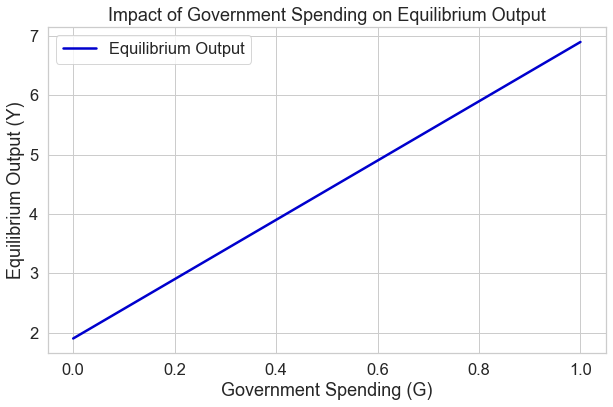

In [16]:
# Create a range of G values
G_values = np.linspace(0, 1, 100)

# Calculate the equilibrium output for each G
Y_values = [steady_state_func(G) for G in G_values]

# Set the style and context of the plot using seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Create the plot
plt.figure(figsize=(10, 6))  # increase figure size
plt.plot(G_values, Y_values, color='mediumblue')  # specify line color
plt.xlabel('Government Spending (G)')
plt.ylabel('Equilibrium Output (Y)')
plt.title('Impact of Government Spending on Equilibrium Output')
plt.legend(['Equilibrium Output'])
plt.grid(True)
plt.show()


# Step 4: Numerical Analysis

For a numerical solution, I will create a Python function that calculates the equilibrium output for a given value of G:

In [17]:
# Define the function for equilibrium output
def equilibrium_output(G_value):
    return float(steady_state_Y.subs(G, G_value))

# Define a range of G values
G_values = np.linspace(0, 1, 500)

# Calculate the equilibrium output for each G
equilibrium_outputs = [equilibrium_output(G) for G in G_values]

# Print some of the calculated equilibrium outputs
for G, Y in zip(G_values[::100], equilibrium_outputs[::100]):  # ::100 will slice every 100th value
    print(f"Equilibrium output for G = {G:.2f} is {Y:.2f}")

# Look for any issues with the solution
# If the solution is valid, there shouldn't be any NaN values in the equilibrium outputs
if np.isnan(equilibrium_outputs).any():
    print("Warning: The solution has convergence issues.")
else:
    print("The solution has no convergence issues.")


Equilibrium output for G = 0.00 is 1.90
Equilibrium output for G = 0.20 is 2.90
Equilibrium output for G = 0.40 is 3.90
Equilibrium output for G = 0.60 is 4.91
Equilibrium output for G = 0.80 is 5.91
The solution has no convergence issues.


# Step 5: Model expansion

I expanded the baseline model beyond the assumed parameter values to include a wide variety of possible tax rates. This extension is motivated by the recognition that tax rates play a crucial role in fiscal policy and have significant implications for the economy. By incorporating different tax rates into the model, we can explore their impact on equilibrium output and gain insights into the effects of varying levels of taxation.

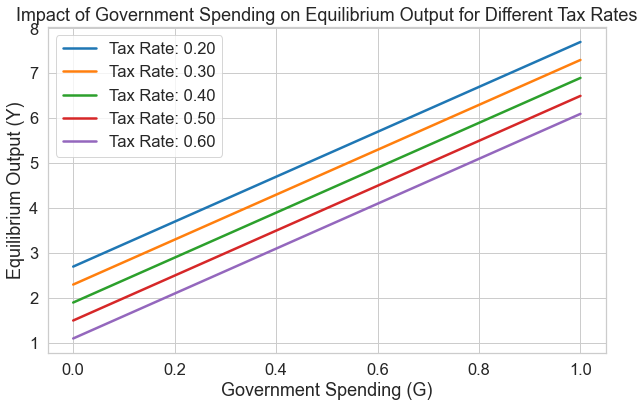

In [27]:

# Define symbols
Y, G = sp.symbols('Y G')

# Define the model parameters (somewhat arbitrarily)
C0 = 0.5  # autonomous consumption
c1 = 0.8  # marginal propensity to consume
I = 0.2   # investment

# Define the equilibrium condition function
def equilibrium_condition(Y, G, T):
    # Define the consumption function
    C = C0 + c1 * (Y - T)
    
    # Define the total spending function
    total_spending = C + I + G
    
    # Define the equilibrium condition (Y = C + I + G)
    return Y - total_spending

# Define the range of tax rates
tax_rates = np.linspace(0.2, 0.6, 5)

# Create an empty list to store the equilibrium output for each tax rate
Y_values_list = []

# Calculate the equilibrium output for each tax rate
for tax_rate in tax_rates:
    # Solve the equilibrium condition for Y at the current tax rate
    solution = sp.solve(equilibrium_condition(Y, G, tax_rate), Y)
    
    # The solution is a list, so get the first (and only) element
    steady_state_Y = solution[0]
    
    # Use lambdify to turn the steady state solution into a Python function
    steady_state_func = sp.lambdify(G, steady_state_Y)
    
    # Create a range of G values
    G_values = np.linspace(0, 1, 100)
    
    # Calculate the equilibrium output for each G at the current tax rate
    Y_values = [steady_state_func(G) for G in G_values]
    
    # Add the equilibrium output values to the list
    Y_values_list.append(Y_values)

# Set the style and context of the plot using seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the equilibrium output as a function of government spending for each tax rate
for i, tax_rate in enumerate(tax_rates):
    plt.plot(G_values, Y_values_list[i])

# Set the labels and title
plt.xlabel('Government Spending (G)')
plt.ylabel('Equilibrium Output (Y)')
plt.title('Impact of Government Spending on Equilibrium Output for Different Tax Rates')

# Create a legend
legend_labels = [f'Tax Rate: {tax_rate:.2f}' for tax_rate in tax_rates]
plt.legend(legend_labels)

# Show the grid
plt.grid(True)

# Display the plot
plt.show()


# Step 6: Conclusion

This project explores the relationship between government spending and equilibrium output using the simple Keynesian Cross model. To enhance the model's analysis, an expansion is introduced by incorporating various tax rates beyond the baseline structure.

The inclusion of different tax rates allows for a more comprehensive examination of the relationship between government spending and equilibrium output. However, the basic structure of the model still results in a linear relationship, where an increase in government spending positively influences equilibrium output.

While the economic insights derived from this analysis may appear limited, the visual representation serves as a helpful tool to enhance understanding of the underlying concept. It provides a clear visualization of the relationship between government spending and equilibrium output within the framework of the model.